<a href="https://colab.research.google.com/github/FlaviaLopes/dio-challenges-coding-the-future-with-baires-dev/blob/main/projeto_2/Redu%C3%A7%C3%A3o_de_dimensionalidade_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


__Projeto para redução de dimensionalidade em imagens__

> _Enunciado_: "Seguindo o exemplo do algoritmo de binarização apresentado em nossa última aula, realize a implementação em Python para transformar uma imagem colorida para níveis de cinza (0 a 255) e para binarizada (0 e 255), preto e branco.
> Por meio da imagem (Figura 1) é possível visualizar os dois casos esperados:"

Seguindo as orientações, as transformações foram aplicadas __sem o uso de  soluções prontas__ presentes nas bibliotecas especializadas de processamento de imagens.

__Bibliotecas utilizadas:__

- numpy: para vetorizar as imagens
- PIL: para ler e exportar as imagens

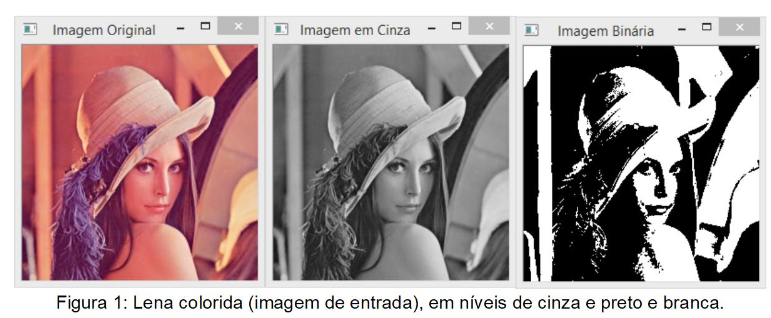



__Loading the data__

- PIL é usada para ler a imagem e convertê-la em RGB.
- numpy é usada para converter a imagem em matriz para operações matemáticas.

A seguir, é possível ver a imagem de dimensão 255x255 colorida e representada em três canais: 255x255x3.

array([[[221, 132, 116],
        [221, 132, 116],
        [221, 132, 116],
        ...,
        [226, 132, 120],
        [233, 141, 126],
        [204, 110, 100]],

       [[221, 132, 116],
        [221, 132, 116],
        [221, 132, 116],
        ...,
        [234, 141, 133],
        [242, 152, 144],
        [206, 115, 112]],

       [[221, 132, 116],
        [221, 132, 116],
        [222, 130, 115],
        ...,
        [198, 108, 107],
        [193, 104, 108],
        [146,  58,  72]],

       ...,

       [[ 92,  21,  65],
        [ 91,  20,  62],
        [ 90,  19,  59],
        ...,
        [122,  38,  71],
        [138,  52,  79],
        [151,  57,  75]],

       [[ 87,  18,  62],
        [ 84,  16,  57],
        [ 85,  14,  56],
        ...,
        [131,  45,  74],
        [153,  61,  86],
        [160,  62,  75]],

       [[ 76,  14,  53],
        [109,  44,  84],
        [ 88,  20,  61],
        ...,
        [157,  62,  86],
        [168,  66,  87],
        [175,  69,  81]]], dtype=uint8)
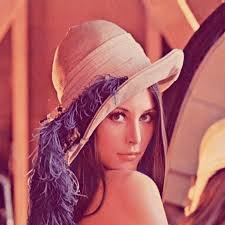

In [1]:
from PIL import Image
import numpy as np

image = Image.open("lena.jpeg")
rgb_image = image.convert("RGB")
rgb_array = np.array(rgb_image)
rgb_array

__Transforming the data__

- a transformação NTSC é aplicada aos três canais RGB, reduzindo a imagem a um canal em escala de cinza.

array([[156, 156, 156, ..., 158, 166, 136],
       [156, 156, 156, ..., 167, 177, 141],
       [156, 156, 155, ..., 134, 131,  85],
       ...,
       [ 47,  46,  44, ...,  66,  80,  87],
       [ 43,  41,  40, ...,  74,  91,  92],
       [ 36,  67,  45, ...,  93,  98, 102]], dtype=uint8)
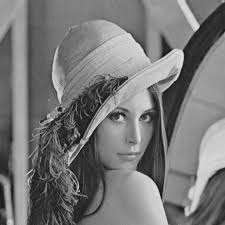

In [2]:
luma_transform = lambda x: x[:,:,0] * 0.299 + x[:,:,1] * 0.587 + x[:,:,2] * 0.114
gray_array = luma_transform(rgb_array).astype(np.uint8)
Image.fromarray(gray_array, mode="L").save("gray_image.jpg")
gray_array

- a escala de cinza é binarizada, valores acima de 127 se tornam 255 e os demais 0.

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
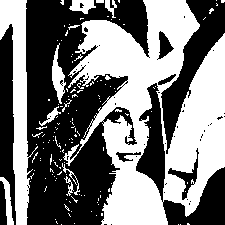

In [3]:
binary_transform = lambda x: 255 if x > 127 else 0
bw_array = np.vectorize(binary_transform)(gray_array).astype(np.uint8)
Image.fromarray(bw_array, mode="L").save("bw_image.jpg")
bw_array

Por hoje é só. Até aqui foi demonstrado como uma imagem em RGB é codificada e como seus canais de cores podem ser manipulados para transformação em outras escalas, como as de cinza e binária.

Estes são alguns dos métodos básicos de redução de dimensionalidade em imagens, e são geralmente feitos de forma automática por bibliotecas especializadas.